In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.svm import SVR
 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
# datasets
data=pd.read_csv('Apple_data_3years.csv')

#features
features= data[['Open','High','Low','Volume','SMA_10','EMA_5','MOM_5','ROC_12','ATR_14','MFI_10','OBV_10',"STO_10","STOK","MACD_10_26"]]
   

In [4]:
#Standardize the data
#X_scaled = (X - X_min) / (X_max - X_min)
min_max_scaler = preprocessing.MinMaxScaler()  
features = min_max_scaler.fit_transform(features) 
 

In [5]:
#Divide training sets and testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    features, data['up'], 
    random_state=1, 
    train_size=0.8, 
    test_size=0.2)


In [6]:
# Kernel Selection
lsvm=svm.SVC(kernel = 'linear')
lsvm.fit(X_train1,Y_train1.astype('int'))
lyp_test=lsvm.predict(X_test1)
lyp_train = lsvm.predict(X_train1)

ssvm=svm.SVC(kernel = 'sigmoid')
ssvm.fit(X_train1,Y_train1.astype('int'))
syp_test=ssvm.predict(X_test1)
syp_train =ssvm.predict(X_train1)

psvm=svm.SVC(kernel = 'poly')
psvm.fit(X_train1,Y_train1.astype('int'))
pyp_test=psvm.predict(X_test1)
pyp_train =psvm.predict(X_train1)

rsvm=svm.SVC(kernel = 'rbf')
rsvm.fit(X_train1,Y_train1.astype('int'))
ryp_test=rsvm.predict(X_test1)
ryp_train =rsvm.predict(X_train1)


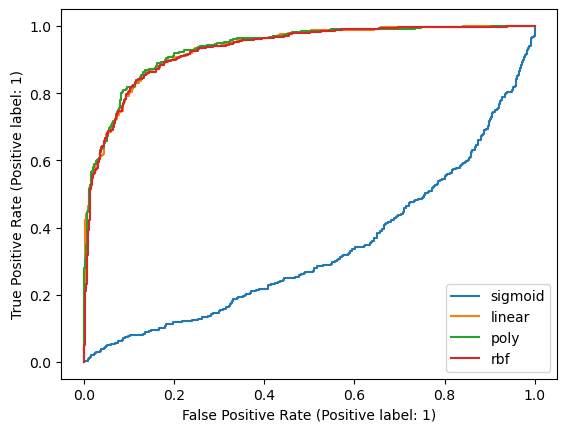

In [7]:


from sklearn.metrics import RocCurveDisplay

ssvm_roc = RocCurveDisplay.from_estimator(ssvm, X_test1,Y_test1,label='sigmoid')
lsvm_roc = RocCurveDisplay.from_estimator(lsvm, X_test1,Y_test1,ax=ssvm_roc.ax_,label='linear')
psvm_roc = RocCurveDisplay.from_estimator(psvm, X_test1,Y_test1,ax=ssvm_roc.ax_,label='poly')
rsvm_roc = RocCurveDisplay.from_estimator(rsvm, X_test1,Y_test1,ax=ssvm_roc.ax_,label='rbf')



In [8]:

def cross_val(model,X,Y):
    pred = cross_val_score(model, X, Y, cv=10) #Predict kernel function with 10 fold cross validation
    return pred.mean()
 
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)   #MSE
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
print("核函数为linear的SVM模型：")
print_evaluate(Y_test1, lyp_test)

print("----------------------------------")

print("核函数为sigmoid的SVM模型：")
print_evaluate(Y_test1, syp_test)
print("----------------------------------")


print("核函数为poly的SVM模型：")
print_evaluate(Y_test1, pyp_test)
print("----------------------------------")

print("核函数为rbf的SVM模型：")
print_evaluate(Y_test1, ryp_test)



核函数为linear的SVM模型：
MAE: 0.13886113886113885
MSE: 0.13886113886113885
RMSE: 0.37264076382105443
R2 Square 0.44435525737790016
__________________________________
----------------------------------
核函数为sigmoid的SVM模型：
MAE: 0.6303696303696303
MSE: 0.6303696303696303
RMSE: 0.793958204422393
R2 Square -1.5223872848528415
__________________________________
----------------------------------
核函数为poly的SVM模型：
MAE: 0.14085914085914086
MSE: 0.14085914085914086
RMSE: 0.37531205797195066
R2 Square 0.4363603689948484
__________________________________
----------------------------------
核函数为rbf的SVM模型：
MAE: 0.14185814185814186
MSE: 0.14185814185814186
RMSE: 0.3766406003846928
R2 Square 0.4323629248033225
__________________________________


----------kernel function is linear----------


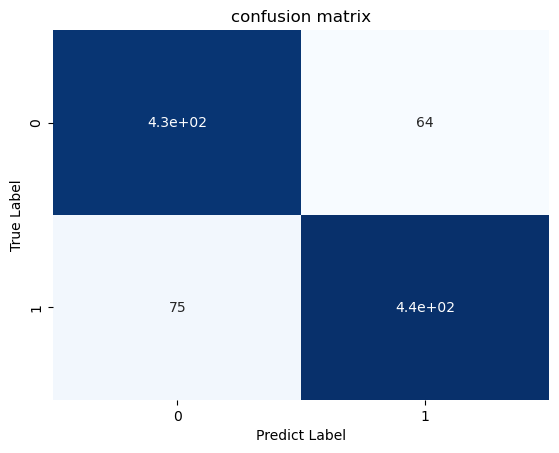

recall: [0.86965377 0.85294118] 
mean recall:0.8613
specificity: [0.85294118 0.86965377] 
mean specificity:0.8613
precision: [0.85059761 0.87174349] 
mean precision:0.8612
F1: [0.86002014 0.86223984] 
mean F1:0.8611
accuracy: [0.86113886 0.86113886] 
mean acc:0.8611
----------kernel function is sigmod----------


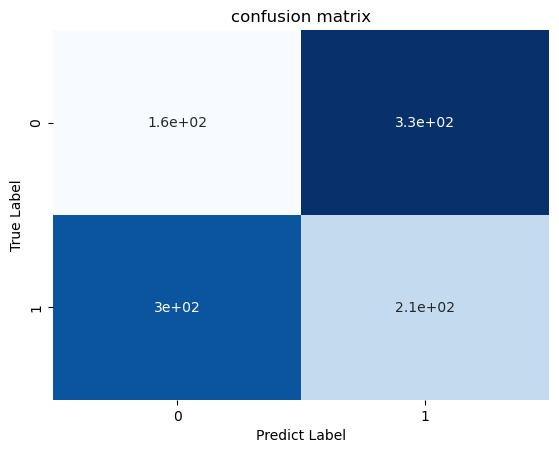

recall: [0.33401222 0.40392157] 
mean recall:0.3690
specificity: [0.40392157 0.33401222] 
mean specificity:0.3690
precision: [0.35042735 0.38649156] 
mean precision:0.3685
F1: [0.34202294 0.39501438] 
mean F1:0.3685
accuracy: [0.36963037 0.36963037] 
mean acc:0.3696
----------kernel function is poly----------


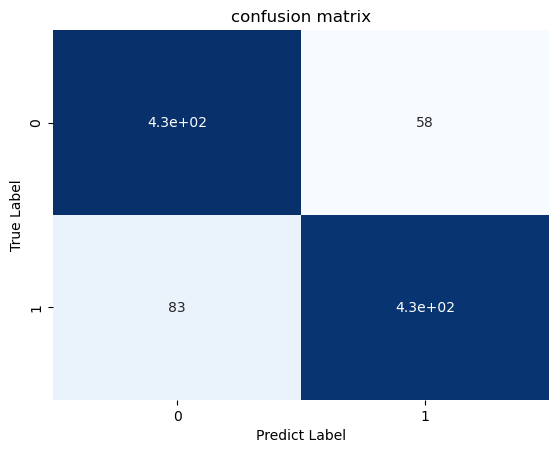

recall: [0.88187373 0.8372549 ] 
mean recall:0.8596
specificity: [0.8372549  0.88187373] 
mean specificity:0.8596
precision: [0.83914729 0.88041237] 
mean precision:0.8598
F1: [0.85998014 0.85829146] 
mean F1:0.8591
accuracy: [0.85914086 0.85914086] 
mean acc:0.8591
----------kernel function is rbf----------


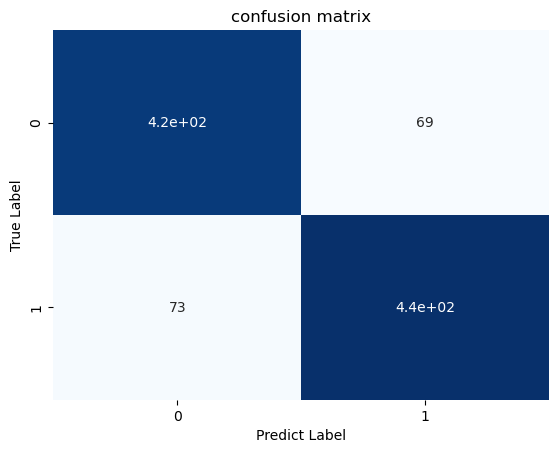

recall: [0.85947047 0.85686275] 
mean recall:0.8582
specificity: [0.85686275 0.85947047] 
mean specificity:0.8582
precision: [0.85252525 0.86363636] 
mean precision:0.8581
F1: [0.85598377 0.86023622] 
mean F1:0.8581
accuracy: [0.85814186 0.85814186] 
mean acc:0.8581


In [9]:
from sklearn.metrics import confusion_matrix 
def cal(y_true, y_pred):

    # confusion matrix row means GT, column means predication
    name = 'confusion matrix'
    '''plot the confusion matrix'''
    mat = confusion_matrix(y_true, y_pred)
    da = pd.DataFrame(mat, index = ['0', '1'])
    sns.heatmap(da, annot =True, cbar = None, cmap = 'Blues')
    plt.title(name)
    # plt.tight_layout()yt
    plt.ylabel('True Label')
    plt.xlabel('Predict Label')
    plt.show()
    plt.close()
    
  
    tp = np.diagonal(mat) # tp
    gt_num = np.sum(mat, axis=1) # axis = 1 
    pre_num = np.sum(mat, axis=0)
    fp = pre_num - tp
    fn = gt_num - tp
    num = np.sum(gt_num)
    num = np.repeat(num, gt_num.shape[0])
    gt_num0 = num - gt_num
    tn = gt_num0 -fp
    recall = tp.astype(np.float32) / gt_num
    specificity = tn.astype(np.float32) / gt_num0
    precision = tp.astype(np.float32) / pre_num
    F1 = 2 * (precision * recall) / (precision + recall)
    accuracy = (tp + tn).astype(np.float32) / num

    print('recall:', recall, '\nmean recall:{:.4f}'.format(np.mean(recall)) )
    print('specificity:', specificity, '\nmean specificity:{:.4f}'.format(np.mean(specificity)))
    print('precision:', precision, '\nmean precision:{:.4f}'.format(np.mean(precision)))
    print('F1:', F1 , '\nmean F1:{:.4f}'.format(np.mean(F1)))
    print('accuracy:', accuracy , '\nmean acc:{:.4f}'.format(np.mean(accuracy)))

print("----------kernel function is linear----------")
cal(Y_test1, lyp_test)

print("----------kernel function is sigmod----------")
cal(Y_test1, syp_test)

print("----------kernel function is poly----------")
cal(Y_test1, pyp_test)

print("----------kernel function is rbf----------")
cal(Y_test1, ryp_test)

In [75]:
# Use GridSearch and CV to find the best parameters. Time consuming ! Do not try it easily!

gamma_range = []
degree_range = []
coef_range=[]

for gamma in range(5, 15, 1):
    gamma_range.append(gamma/10 )
for degree in range(1, 4, 1):
    degree_range.append(degree)
for coef in range(0, 5, 1):
    coef_range.append(coef)
    
param_grid = dict(degree=degree_range, gamma=gamma_range,coef0=coef_range)
print(param_grid)

rbk = RepeatedKFold(n_splits=5, n_repeats=5, random_state=12)
grid = GridSearchCV(svm.SVC(kernel='poly'), param_grid=param_grid, cv=rbk)
grid.fit(X_train1, Y_train1.ravel())

print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))


{'degree': [1, 2, 3], 'gamma': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4], 'coef0': [0, 1, 2, 3, 4]}
The best parameters are {'coef0': 4, 'degree': 3, 'gamma': 1.4} with a score of 0.91


SVM with poly kernel function under best parameters ：
MAE: 0.12601626016260162
MSE: 0.12601626016260162
RMSE: 0.3549876901564357
R2 Square 0.49187100213219626
__________________________________


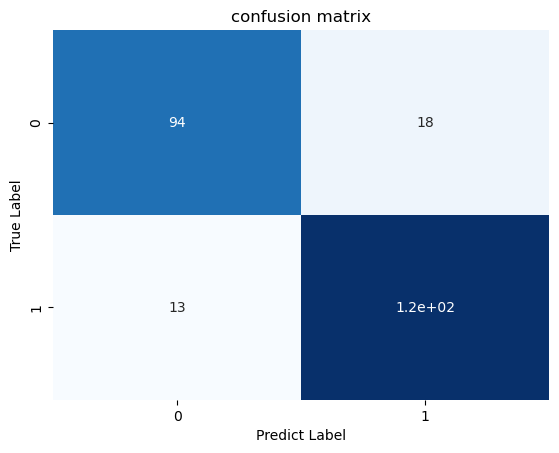

recall: [0.83928571 0.90298507] 
mean recall:0.8711
specificity: [0.90298507 0.83928571] 
mean specificity:0.8711
precision: [0.87850467 0.8705036 ] 
mean precision:0.8745
F1: [0.85844749 0.88644689] 
mean F1:0.8724
accuracy: [0.87398374 0.87398374] 
mean acc:0.8740


In [71]:
psvm_best=svm.SVC(kernel = 'poly',degree = 3, gamma=1.4,coef0=4)    # degree = 3, gamma=1.4,coef0=4 are best parameters
psvm_best.fit(X_train1,Y_train1.astype('int'))
pyp_test_best=psvm_best.predict(X_test1)
pyp_train_best =psvm_best.predict(X_train1)

print("SVM with poly kernel function under best parameters ：")
print_evaluate(Y_test1, pyp_test_best)
cal(Y_test1, pyp_test_best)    #confusion matix and accuracy

In [44]:
#pca降维
#直接使用sklearn中的PCA进行降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(features)
xx=pca.transform(features) # 降维后的结果
train_data2,test_data2,train_label2,test_label2=train_test_split(xx,data['up'],random_state=1,train_size=0.8,test_size=0.2)#降维后的测试集划分

In [45]:
model=svm.SVC(kernel = 'poly',degree = 3, gamma=1.4,coef0=4)
model.fit(train_data2,train_label2.ravel())

SVC(coef0=4, gamma=1.4, kernel='poly')

In [48]:
def border_of_classifier(sklearn_cl, x, y):
    """
    param sklearn_cl: sklearn的分类器
    param x: np.array
    param y: np.array
    """
    
    # 1.生成网格数据
    x_min, y_min = x.min(axis=0) 
    x_max, y_max = x.max(axis=0) 
    # 利用一组网格数据求出方程的值， 然后把边界画出来
    # 生成网格点坐标矩阵。
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                    np.arange(y_min, y_max, 0.01))
    # 计算处分类器对所有数据点的分类姐夫哦，生成网格采样
    mesh_output = sklearn_cl.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape)
    fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
    # 根据mesh_output结果自动从cmap中选择颜色
    
    cm_dark=matplotlib.colors.ListedColormap(['g','r','b'])  #设置点集颜色格式
    cm_light=matplotlib.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])  #设置边界颜色


    plt.pcolormesh(x_values, y_values, mesh_output, cmap=cm_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=100, edgecolors='k',zorder=2,cmap=cm_dark, linewidth=1)
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    plt.xticks((np.arange(np.ceil(min(x[:, 0]) - 1), np.ceil(max(x[:, 0]) + 1), 1.0)))
    plt.yticks((np.arange(np.ceil(min(x[:, 1]) - 1), np.ceil(max(x[:, 1]) + 1), 1.0)))
    plt.show()


E:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


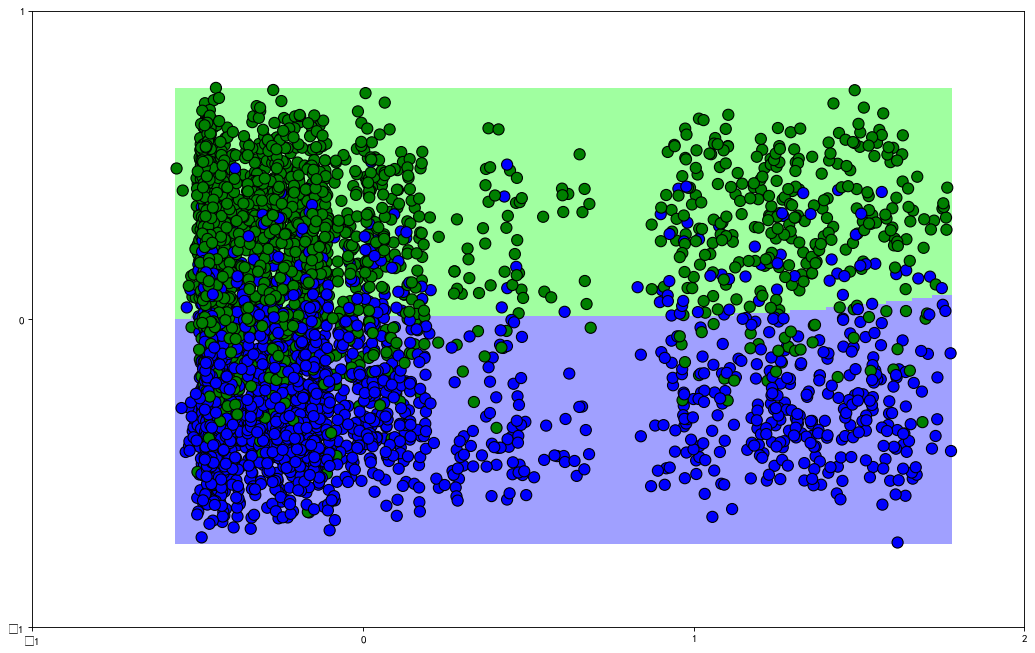

In [49]:
#训练集和测试集的预测结果
trainPredict = model.predict(train_data2)
testPredict = model.predict(test_data2)

border_of_classifier(model,train_data2,train_label2)


## 2. price  prediction - SVR

In [79]:

def cross_val(model,X,Y):
    pred = cross_val_score(model, X, Y, cv=10) #Predict kernel function with 10 fold cross validation
    return pred.mean()
 

In [89]:
split_num=int(len(features)*0.80)
X_train=features[:split_num]
Y_train=target[:split_num]
X_test=features[split_num:]
Y_test=target[split_num:]

In [105]:

svm_reg = SVR(kernel='poly')  #nolinear with kernel function RBF,K(x, y) = exp(-gamma * ||x - y||^2)
print(cross_val(svm_reg,X_train, Y_train))
svm_reg.fit(X_train, Y_train)       

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)


-7.64425793224432
Test set evaluation:
_____________________________________
MAE: 7.98155374533266
MSE: 117.09362642329567
RMSE: 10.82098084386511
R2 Square 0.6712373578697406
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.888901150254422
MSE: 71.9599440333355
RMSE: 8.482920725394969
R2 Square 0.9634626314348386
__________________________________


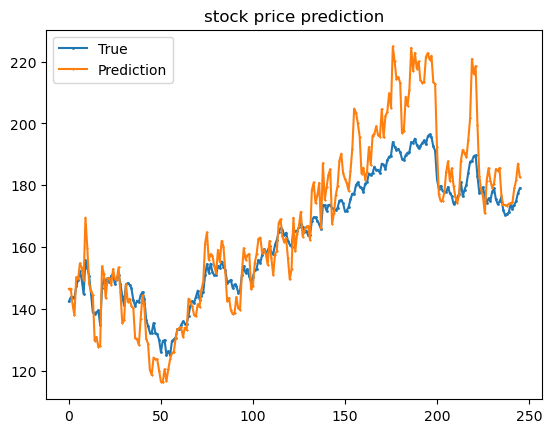

In [106]:
# visualization

plt.plot(list(range(0,len(X_test))),Y_test,marker='o',markersize=1 )
plt.plot(list(range(0,len(X_test))),test_pred,marker='*',markersize=1 )
plt.legend(['True','Prediction'])
plt.title('stock price prediction')
plt.grid(False)
plt.savefig('price prediction using SVM.png')
plt.show()